In [1]:
import os
import skimage.io as io
%matplotlib inline
import tensorflow as tf
from sys import path as import_path
import_path.append('../code/models/research/slim/')
from nets import inception
from nets import inception_utils
from preprocessing import inception_preprocessing
from datasets import imagenet

slim = tf.contrib.slim
image_size = inception.inception_v3.default_image_size
model_path = './inception_v3.ckpt'
print(tf.__version__)

1.4.0-rc1


In [2]:
img_path = tf.placeholder(tf.string)

img_file = tf.read_file(img_path)
img = tf.image.decode_jpeg(img_file, channels=3)
processed_image = inception_preprocessing.preprocess_image(img,
                                                           image_size,
                                                           image_size,
                                                           is_training=False)
processed_images  = tf.expand_dims(processed_image, 0)
input_images = tf.placeholder(tf.float32, [None, image_size, image_size, 3])
with slim.arg_scope(inception_utils.inception_arg_scope()):
    logits, end_points = inception.inception_v3(input_images, num_classes=1001, is_training=False)

PreLogits= tf.squeeze(end_points['PreLogits'])
probabilities = tf.nn.softmax(logits)
init_fn = slim.assign_from_checkpoint_fn(model_path,
    slim.get_model_variables('InceptionV3'))

In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True

with tf.Session(config=config) as sess:
    init_fn(sess)
    imgs = sess.run(processed_images, feed_dict = {img_path:'../dataset/cat.jpg'})
    probs = sess.run(probabilities, feed_dict = {input_images:imgs})

INFO:tensorflow:Restoring parameters from ./inception_v3.ckpt


In [4]:
probs = probs[0]
print(probs)

[ 0.00019026  0.00016695  0.00019474 ...,  0.00027465  0.00063039
  0.00033159]


Probability 0.31 => [Siamese cat, Siamese]
Probability 0.23 => [tiger cat]
Probability 0.07 => [Persian cat]
Probability 0.03 => [leopard, Panthera pardus]
Probability 0.03 => [cougar, puma, catamount, mountain lion, painter, panther, Felis concolor]


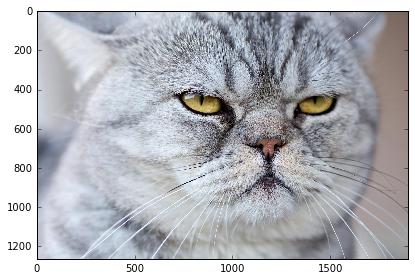

In [5]:
sorted_inds = [i[0] for i in sorted(enumerate(-probs), key=lambda x:x[1])]
names = imagenet.create_readable_names_for_imagenet_labels()
for i in range(5):
    index = sorted_inds[i]
    print('Probability %0.2f => [%s]' % (probs[index], names[index+1]))

# res = slim.get_model_variables()

io.imshow('../dataset/cat.jpg')